In [454]:
import re

import matplotlib.pyplot as plt
import nltk.corpus
import numpy as np
import pandas as pd
import simplemma
import spacy
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from tqdm import tqdm
import seaborn as sns

nltk.download('stopwords')
nlp = spacy.load("sv_core_news_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arthur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [455]:
df_articles = pd.read_csv("sävsjö_articles.csv", encoding="utf-8")
df_links = pd.read_csv("sävsjö_links.csv", delimiter=";")
df_tags = pd.read_csv("sävsjö_tags.csv")

In [456]:
sns.displot(df_links.tag_id)

In [457]:
df_articles.head(-5)

,ID,Title,Text
0,2,Aktiespararna säger ja till Gunvorbudet<span> - di.se</span>,Aktiespararna rekommenderar sina medlemmar att anta budpliktsbudet som Gunvor Group har lagt på...
1,5,NaN,Men den här gången är det enbart Anders Eklunds eget blod. år sedan han senast visade sig i offe...
2,7,Man fast i en timme i grop<span> - kuriren.nu</span>,En man i 60-årsåldern föll ner i en grop som var grävd på sin egen tomt utanför Sävsjö. I en tim...
3,8,Mannen fastnade i en grop  i flera timmar<span> - expressen.se</span>,En man i 60-årsåldern trillade ner i ett grävt hål på sin tomt.  Han hade varit i gropen en stu...
4,56,En motorcykel,Här är den längre versionen.
...,...,...,...
8595,255163,Samrådsmöten för framtidens kommun - här är alla träffar,"<b>Nu bjuder kommunen in medborgare till samr&aring;dsm&ouml;ten runt om i kommunen, dit det g&a..."
8596,255200,Nu kan du förtidsrösta - så här går du tillväga,"<b>Fr&aring;n och med idag, onsdagen den 24 augusti, &auml;r det m&ouml;jligt att f&ouml;rtidsr&..."
8597,255240,"Medeltidsdagarna storsatsar - världsmusiker och riddarspel: ""Vingslagen från förr""","<b>Medeltidsdagarna i Hj&auml;rtlanda st&aring;r f&ouml;r d&ouml;rren, och i &aring;r satsas det..."
8598,255366,"Socialnämnden: ""Kommer hantera den oro som uttryckts i Sävsjöappen""",<b>I veckan svarade socialchef Linda Bj&ouml;rk p&aring; kritik fr&aring;n undersk&ouml;terskor ...


In [458]:
df_articles.loc[8599]["Text"]

'<b>Inf&ouml;r gymnasieelever&nbsp;p&aring; Aleholmsskolan h&ouml;lls ig&aring;r en intensiv&nbsp;politikerdebatt - med b&aring;de politiker fr&aring;n kommunen och ungdomsf&ouml;rbund.</b><br /><b>Aktuella &auml;mnen lyftes, och det blev b&aring;de en och tv&aring; gliringar mellan partierna.</b><br /><b>&ndash; Jag tycker det &auml;r intressant, och viktigt att vi f&aring;r lyssna p&aring; debatten, s&auml;ger eleven Celine Boutin.</b><br /><br />Fr&aring;n morgon &auml;nda fram till lunch h&ouml;lls en politikerdebatt i Aleholmsskolan under onsdagen.<br />Elever i &aring;rskurs tre ledde debatten, som var uppdelad i tre omg&aring;ngar och ber&ouml;rde flera aktuella &auml;mnen.<br /><br />Representanter fr&aring;n sex av &aring;tta riksdagspartier var p&aring; plats; Socialdemokraterna, Moderaterna, Sverigedemokraterna, Kristdemokraterna, Liberalerna och Centerpartiet. Milj&ouml;partiet och V&auml;nsterpartiet hade inte m&ouml;jlighet att delta.<br /><br />Fr&aring;n S, M, L och C d

In [459]:
df_articles.shape

(8605, 3)

In [460]:
df_articles.isnull().mean()

ID       0.000000
Title    0.000232
Text     0.000000
dtype: float64

In [461]:
df_articles.dropna(inplace=True)
df_articles.isnull().mean()

ID       0.0
Title    0.0
Text     0.0
dtype: float64

In [462]:
df_articles["Text"].head(-5)

0       Aktiespararna rekommenderar sina medlemmar att anta budpliktsbudet  som Gunvor Group har lagt på...
2       En man i 60-årsåldern föll ner i en grop som var grävd på sin egen tomt utanför Sävsjö. I en tim...
3       En man i 60-årsåldern trillade ner i ett grävt hål på sin tomt.  Han hade varit i gropen en stu...
4                                                                              Här är den längre versionen.
5       Det börjar bli vinter och kallt. Då är det skönt med en braskamin. Någon som uppenbarligen visst...
                                                       ...                                                 
8595    <b>Nu bjuder kommunen in medborgare till samr&aring;dsm&ouml;ten runt om i kommunen, dit det g&a...
8596    <b>Fr&aring;n och med idag, onsdagen den 24 augusti, &auml;r det m&ouml;jligt att f&ouml;rtidsr&...
8597    <b>Medeltidsdagarna i Hj&auml;rtlanda st&aring;r f&ouml;r d&ouml;rren, och i &aring;r satsas det...
8598    <b>I veckan svarade 

In [463]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [464]:
def remove_unwanted_characters(text):
    return re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)

In [465]:
def remove_digits(text):
    return re.sub(r'[0-9]', '', text)

In [466]:
def remove_stop_words(text):
    stop = stopwords.words('swedish')
    return " ".join([word for word in text.split() if word not in (stop)])

In [467]:
def lemmatize_swedish(text: str) -> list[str]:
    text_list = text.split()
    return [simplemma.lemmatize(word, lang='sv') for word in text_list]

Text Cleaning

In [468]:
df_articles["Text"] = df_articles["Text"].apply(remove_html_tags)
df_articles = df_articles[~df_articles["Text"].str.contains("&|;|", regex=True)]
df_articles = df_articles[df_articles["Text"].str.len() > 15]

df_articles["Text"] = df_articles["Text"].apply(remove_unwanted_characters)
df_articles["Text"] = df_articles["Text"].apply(remove_digits)
df_articles["Text"] = df_articles["Text"].apply(remove_stop_words)
df_articles["Text"] = [" ".join([w for w in text.split() if len(w)>3]) for text in df_articles["Text"]]
df_articles["LDA"] = df_articles["Text"].apply(lemmatize_swedish)
df_articles["LDA"] = [[item for item in row_list if len(item) > 1] for row_list in df_articles["LDA"]]
# df_articles["Text"] = df_articles["Text"].apply(lemmatize_swedish)
# df_articles["Text"] = [" ".join(text_list) for text_list in df_articles["Text"]]  Remove both last line if you wanna remove the lemmatize step

In [469]:
df_articles.head(-5)

,ID,Title,Text,LDA
0,2,Aktiespararna säger ja till Gunvorbudet<span> - di.se</span>,Aktiespararna rekommenderar medlemmar anta budpliktsbudet Gunvor Group lagt Rrvik Timber Aktiesp...,"[Aktiespararna, rekommendera, medlem, anta, budpliktsbudet, Gunvor, Group, lagd, Rrvik, Timber, ..."
2,7,Man fast i en timme i grop<span> - kuriren.nu</span>,rsldern grop grvd egen tomt utanfr Svsj timme meter djupa hlet,"[rsldern, grop, grvd, egen, tomta, utanfr, Svsj, timme, meter, djup, hlet]"
3,8,Mannen fastnade i en grop  i flera timmar<span> - expressen.se</span>,rsldern trillade grvt tomt gropen stund innan hittades sger David,"[rsldern, trilla, grvt, tomta, grop, stunda, innan, hitta, sger, David]"
4,56,En motorcykel,lngre versionen,"[lngre, version]"
5,66,Stulna braskaminer för 50 000 ska värma,brjar vinter kallt sknt braskamin Ngon uppenbarligen visste Smlandsvillan Vrigstad sitt frrd sda...,"[brjar, vinter, kall, sknt, braskamin, Ngon, uppenbarligen, veta, Smlandsvillan, Vrigstad, sitta..."
...,...,...,...,...
5952,31415,Drygt 100 sommarjobb väntar på ungdomar som vill jobba,Varje erbjuder kommunen sommarjobb elever nian frsta gymnasiet rknar drygt jobb barnomsorg ldreo...,"[varje, erbjuda, kommun, sommarjobb, elev, nia, frsta, gymnasium, rknar, dryg, jobb, barnomsorg,..."
5953,31416,Man i 20-årsåldern misstänkt för drograttfylleri,halv fyra natten sndag polispatrull trffade landsbygden norr Vrigstad Bakom ratten satt rsldern ...,"[halva, fyra, natt, sndag, polispatrull, trffade, landsbygd, norr, Vrigstad, Bakom, ratt, sätta,..."
5956,31421,"""Betala inga pengar""",Bluffmejl avsndaren krver pengar avslja personliga saker dyker jmna ojmna mellanrum sndags fick ...,"[Bluffmejl, avsndaren, krver, peng, avslja, personlig, sak, dyka, jmna, ojmna, mellanrum, sndags..."
5957,31423,Nu blir det Skogsmässa i Sävsjö igen,Jnkpings finns skogsfretagare finns Svsj kommun Vrdet skogen kommunen miljarder rknat frsljnings...,"[Jnkpings, finna, skogsfretagare, finna, Svsj, kommun, Vrdet, skog, kommun, miljard, rknat, frsl..."


In [470]:
df_articles.shape

(4654, 4)

Tokenization

In [471]:
df_articles["Token"] = [nlp(text).vector for text in tqdm(df_articles["Text"])]

100%|██████████| 4654/4654 [01:10<00:00, 65.73it/s]


In [472]:
df_articles = df_articles[df_articles['Token'].map(len) == 96]

In [473]:
train = np.stack(df_articles["Token"].to_numpy())
train

array([[ 2.15923861e-01, -4.94013697e-01,  1.94112644e-01, ...,
         5.90006590e-01,  2.05245078e-01, -1.02402723e+00],
       [ 8.39016648e-05,  6.86599314e-01,  6.91803515e-01, ...,
         1.69081914e+00,  2.88047902e-02, -2.50416684e+00],
       [ 8.57185245e-01,  6.11972332e-01,  9.92855877e-02, ...,
         6.51204705e-01,  3.47566068e-01, -1.48749185e+00],
       ...,
       [ 1.15278093e-02,  5.41678488e-01, -2.16523528e-01, ...,
         6.03822589e-01,  5.79916716e-01, -9.08250868e-01],
       [ 1.16465084e-01,  8.01888168e-01, -1.42070913e+00, ...,
         1.01138723e+00,  5.60105562e-01, -1.33469117e+00],
       [-4.42417786e-02,  1.26693285e+00, -1.07529342e+00, ...,
        -2.39271328e-01,  5.50799727e-01, -1.82641995e+00]], dtype=float32)

In [474]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

# assign each data point to a cluster
results = kmeans.fit_predict(train)

In [475]:
# Kmeans elbow
kmeans_list = [KMeans(ncluster) for ncluster in range(1,50, 2)]
kmeans_results_list = [-model.fit(train).score(train) for model in tqdm(kmeans_list)]

100%|██████████| 25/25 [00:11<00:00,  2.12it/s]


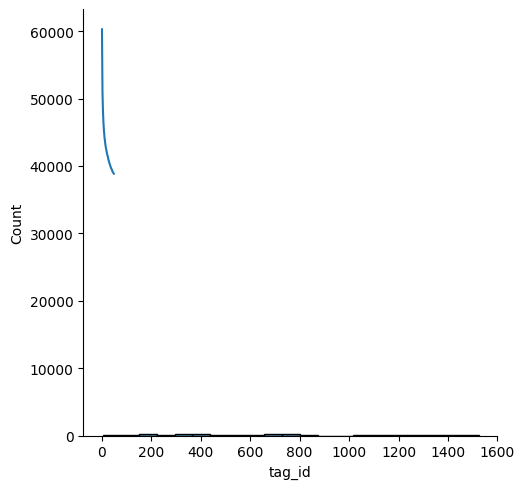

In [476]:
X = range(1,50,2)
sns.lineplot(x=X, y=kmeans_results_list)
plt.show()

Plotting

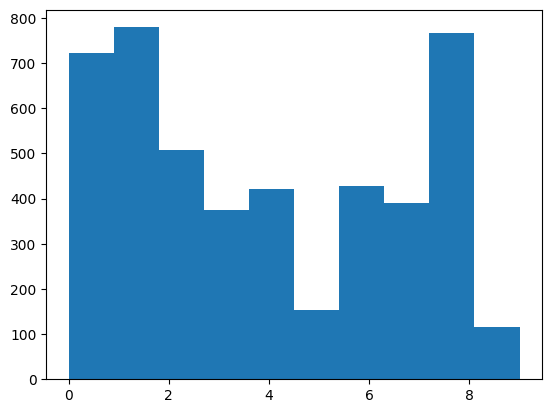

In [477]:
plt.hist(results)
plt.show()

In [478]:
df_articles["Results"] = results

In [479]:
# from IPython.display import display
# with pd.option_context('display.max_rows', 10000, 'display.max_columns', None, 'display.max_colwidth', -1):
#     display(df_articles.loc[:10, ["ID", "Text", "Results"]])

In [480]:
df_articles["Text"][191]

'Somliga vill komma vldoft pris beskte torsdagen butik Svsj sdant sljs frsvann drifrn sigMnstret vanliga personalens intresse fngat medan andre fngade vrdefull kosmetika frsvann avsljade sortimentet fljt Godsvrdet helt klarlagt Polisen visst grepp grningsmnnen'

In [481]:
df_articles["Text"][192]

'Strax klockan natten lrdagen larmades rddningstjnsten Svsj brjat brinna vgen norr Svsj Ingen mnniska fanns kvar olycksplatsen halt olyckstillfllet'

In [482]:
df_articles.head(-10)

,ID,Title,Text,LDA,Token,Results
0,2,Aktiespararna säger ja till Gunvorbudet<span> - di.se</span>,Aktiespararna rekommenderar medlemmar anta budpliktsbudet Gunvor Group lagt Rrvik Timber Aktiesp...,"[Aktiespararna, rekommendera, medlem, anta, budpliktsbudet, Gunvor, Group, lagd, Rrvik, Timber, ...","[0.21592386, -0.4940137, 0.19411264, 0.5989239, -1.0079784, 1.1758898, -0.5304268, -0.7126832, 1...",5
2,7,Man fast i en timme i grop<span> - kuriren.nu</span>,rsldern grop grvd egen tomt utanfr Svsj timme meter djupa hlet,"[rsldern, grop, grvd, egen, tomta, utanfr, Svsj, timme, meter, djup, hlet]","[8.3901665e-05, 0.6865993, 0.6918035, -0.09584327, 0.40376252, 0.9938805, 2.9345918, 1.0626374, ...",7
3,8,Mannen fastnade i en grop  i flera timmar<span> - expressen.se</span>,rsldern trillade grvt tomt gropen stund innan hittades sger David,"[rsldern, trilla, grvt, tomta, grop, stunda, innan, hitta, sger, David]","[0.85718524, 0.61197233, 0.09928559, -0.32281536, -0.78014326, 1.5318137, 1.4922129, 0.5263301, ...",3
4,56,En motorcykel,lngre versionen,"[lngre, version]","[-0.3155772, -0.904063, -0.1646692, 1.0503582, -1.0743849, 1.1033317, 0.61855716, 0.33354175, 1....",4
5,66,Stulna braskaminer för 50 000 ska värma,brjar vinter kallt sknt braskamin Ngon uppenbarligen visste Smlandsvillan Vrigstad sitt frrd sda...,"[brjar, vinter, kall, sknt, braskamin, Ngon, uppenbarligen, veta, Smlandsvillan, Vrigstad, sitta...","[0.31652406, 0.53842425, -0.576636, 0.49906793, -0.1711074, 1.3769499, 1.3248214, 0.8928145, 0.3...",3
...,...,...,...,...,...,...
5947,31403,Vrigstadån sjunker stadigt - 27 centimeter lägre än i tisdags,fortsatt flden Vrigstadn sjunker sakta Nytt regn frvntas kommande dagarna Lnsstyrelsen enligt SM...,"[fortsätta, flden, Vrigstadn, sjunka, sakta, nytta, regna, frvntas, komma, dag, Lnsstyrelsen, en...","[0.10990223, 0.33036214, -0.45547625, -0.34469807, -0.79912275, 0.9419913, 1.2885416, 0.08188683...",8
5948,31404,35 kubik i sekunden flödar genom Långö,Anders Meijer produktionschef Statkraft kraftverket berttar frberedda fldet brjan veckan Redan f...,"[Anders, Meijer, produktionschef, Statkraft, kraftverk, berttar, frberedda, fldet, brjan, vecka,...","[0.3863172, 0.46605042, -0.25579634, -0.54106617, -0.6033084, 1.284547, 1.368794, 0.12661871, 0....",8
5949,31411,Rattfyllerist körde ner staket och smet,fastighetsgare Rrvik fick meter sitt staket frstrt tidigt sndag morgon bilist enligt polisen sta...,"[fastighetsgare, Rrvik, ficka, meter, sitta, staket, frstrt, tidig, sndag, morgon, bilist, enlig...","[0.35986817, 0.48283038, -0.06503655, 0.33662662, -0.3767832, 1.0857421, 1.2879616, 0.42570022, ...",3
5950,31413,Barriärer blir kvar ett tag till,Helgens regn pverkade annars sjunkande vattennivn Vrigstad stiga lrdag kvll mndag morgon haft kn...,"[helg, regna, pverkade, annars, sjunka, vattennivn, Vrigstad, stiga, lrdag, kvll, mndag, morgon,...","[0.2427925, 0.4845519, -0.6829824, -0.40374273, -0.5208297, 1.0857167, 1.3930038, 0.697924, 0.25...",2


In [483]:
sklearn_pca = PCA(n_components = 2) # Using PCA to remove cols which has less co-relation
Y_sklearn = sklearn_pca.fit_transform(train)
sum(sklearn_pca.explained_variance_ratio_)

0.25714826583862305

LDA

In [484]:
import gensim

id2word = gensim.corpora.Dictionary(df_articles["LDA"])
corpus = [id2word.doc2bow(text) for text in df_articles["LDA"]]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=10,
                                            passes=10,
                                            alpha='symmetric',
                                            iterations=100,
                                            per_word_topics=True)

lda_model.print_topics()

[(0,
  '0.022*"plats" + 0.017*"polis" + 0.013*"person" + 0.011*"ficka" + 0.010*"Svsj" + 0.010*"ngon" + 0.010*"ske" + 0.010*"sen" + 0.009*"Stockaryd" + 0.009*"timme"'),
 (1,
  '0.178*"sger" + 0.035*"ngot" + 0.030*"barn" + 0.026*"genom" + 0.017*"innan" + 0.017*"ngon" + 0.016*"vatten" + 0.015*"gller" + 0.013*"sitta" + 0.013*"hitta"'),
 (2,
  '0.031*"finna" + 0.029*"ocks" + 0.026*"annan" + 0.014*"komma" + 0.012*"berttar" + 0.012*"hel" + 0.012*"olik" + 0.011*"bar" + 0.008*"ngra" + 0.007*"mången"'),
 (3,
  '0.023*"kommun" + 0.020*"komma" + 0.017*"villa" + 0.014*"stor" + 0.011*"lite" + 0.011*"Svsj" + 0.010*"mnga" + 0.008*"jobba" + 0.007*"skola" + 0.007*"besluta"'),
 (4,
  '0.022*"lite" + 0.013*"Kerstin" + 0.013*"resa" + 0.012*"mnga" + 0.010*"kyrka" + 0.008*"musik" + 0.008*"Dag" + 0.007*"gngen" + 0.006*"besk" + 0.006*"Anna"')]

In [485]:
def format_topics_sentences(texts, ldamodel=None, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(df_articles["Text"], ldamodel=lda_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_7416\1116919594.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Arthur\AppData\Local\Temp\ipykernel_7416\1116919594.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.4070,"sger, ngot, barn, genom, innan, ngon, vatten, gller, sitta, hitta",Aktiespararna rekommenderar medlemmar anta budpliktsbudet Gunvor Group lagt Rrvik Timber Aktiesp...
1,1,0.0,0.6682,"plats, polis, person, ficka, Svsj, ngon, ske, sen, Stockaryd, timme",NaN
2,2,1.0,0.5975,"sger, ngot, barn, genom, innan, ngon, vatten, gller, sitta, hitta",rsldern grop grvd egen tomt utanfr Svsj timme meter djupa hlet
3,3,3.0,0.4024,"kommun, komma, villa, stor, lite, Svsj, mnga, jobba, skola, besluta",rsldern trillade grvt tomt gropen stund innan hittades sger David
4,4,1.0,0.5612,"sger, ngot, barn, genom, innan, ngon, vatten, gller, sitta, hitta",lngre versionen
5,5,3.0,0.8798,"kommun, komma, villa, stor, lite, Svsj, mnga, jobba, skola, besluta",brjar vinter kallt sknt braskamin Ngon uppenbarligen visste Smlandsvillan Vrigstad sitt frrd sda...
6,6,0.0,0.5154,"plats, polis, person, ficka, Svsj, ngon, ske, sen, Stockaryd, timme",Svsj kommun skolchef heter Stefan Claesson jobbar just Jnkping brja basa elever Svsj klart frhan...
7,7,3.0,0.6581,"kommun, komma, villa, stor, lite, Svsj, mnga, jobba, skola, besluta",signalfel strckan SdertljeStockholm fredagsmorgonen satte stopp tgtrafik Stoppet drabbar sikt tr...
8,8,2.0,0.6647,"finna, ocks, annan, komma, berttar, hel, olik, bar, ngra, mången",Stora grupper pensionrer Svsj krigsstigen landstinget planerna dramatisk frndring sjukvrden PROf...
9,9,2.0,0.5292,"finna, ocks, annan, komma, berttar, hel, olik, bar, ngra, mången",test jdklsa jfkldsa sjfkldsa jfklsdajflskadr


In [486]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9753,"plats, polis, person, ficka, Svsj, ngon, ske, sen, Stockaryd, timme",mjligheten gavs statsbidrag Lgstadiesatsningen lsret bestmde Svsj kommun lite annorlunda satsnin...
1,1.0,0.6305,"sger, ngot, barn, genom, innan, ngon, vatten, gller, sitta, hitta",Fljande hlsning Daniel Bhlin lades nyss Rrvik Samhllsfrenings facebooksida Rrviksborvill tacka u...
2,2.0,0.9721,"finna, ocks, annan, komma, berttar, hel, olik, bar, ngra, mången",mnaden lnsdans gnger Svsj lrdags dags beskare fullt sger Kerstin Hvirf SvsjLnsdansen populr ngot...
3,3.0,0.9121,"kommun, komma, villa, stor, lite, Svsj, mnga, jobba, skola, besluta",Ngon satt klistermrke tillhrande rsldern Rrvik Mrket budskap uppfattas rasististiskt polisanmlan...
4,4.0,0.9837,"lite, Kerstin, resa, mnga, kyrka, musik, Dag, gngen, besk, Anna",Klockan domarens vissla start frsta matchen gruppspelet Fyra grupper fyra vardera kmpade vandrin...


c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and wi

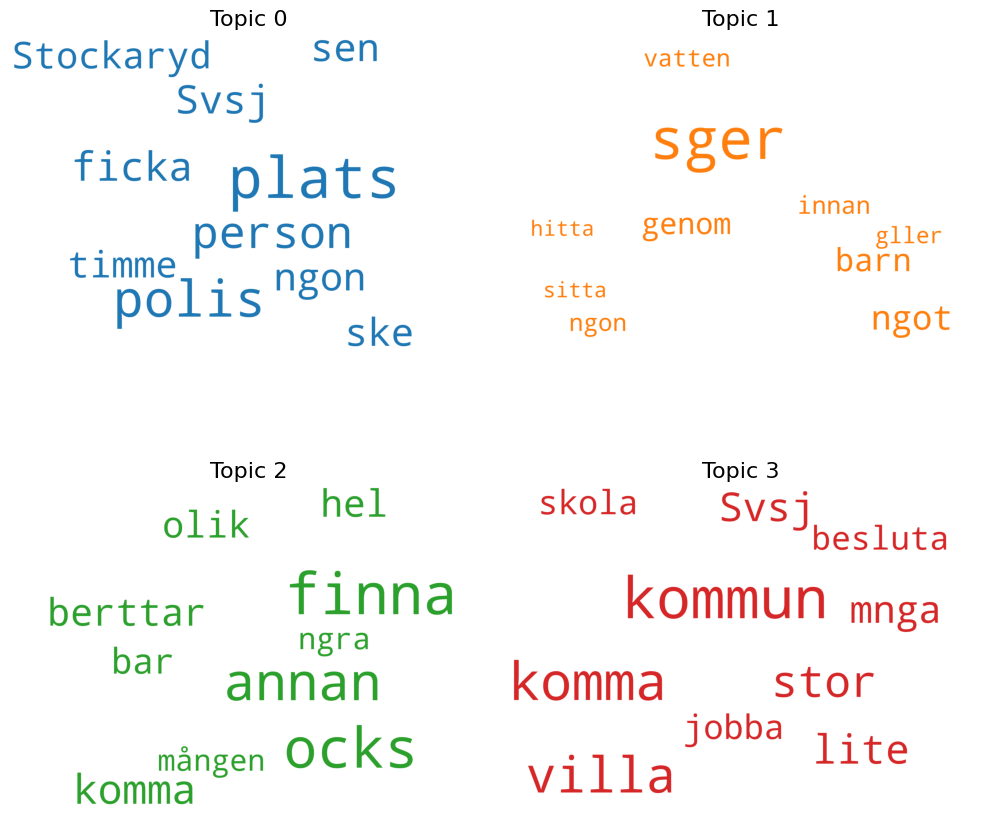

In [487]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\Arthur\AppData\Local\Temp\ipykernel_7416\3185471760.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Arthur\AppData\Local\Temp\ipykernel_7416\3185471760.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Arthur\AppData\Local\Temp\ipykernel_7416\3185471760.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Arthur\AppData\Local\Temp\ipykernel_7416\3185471760.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


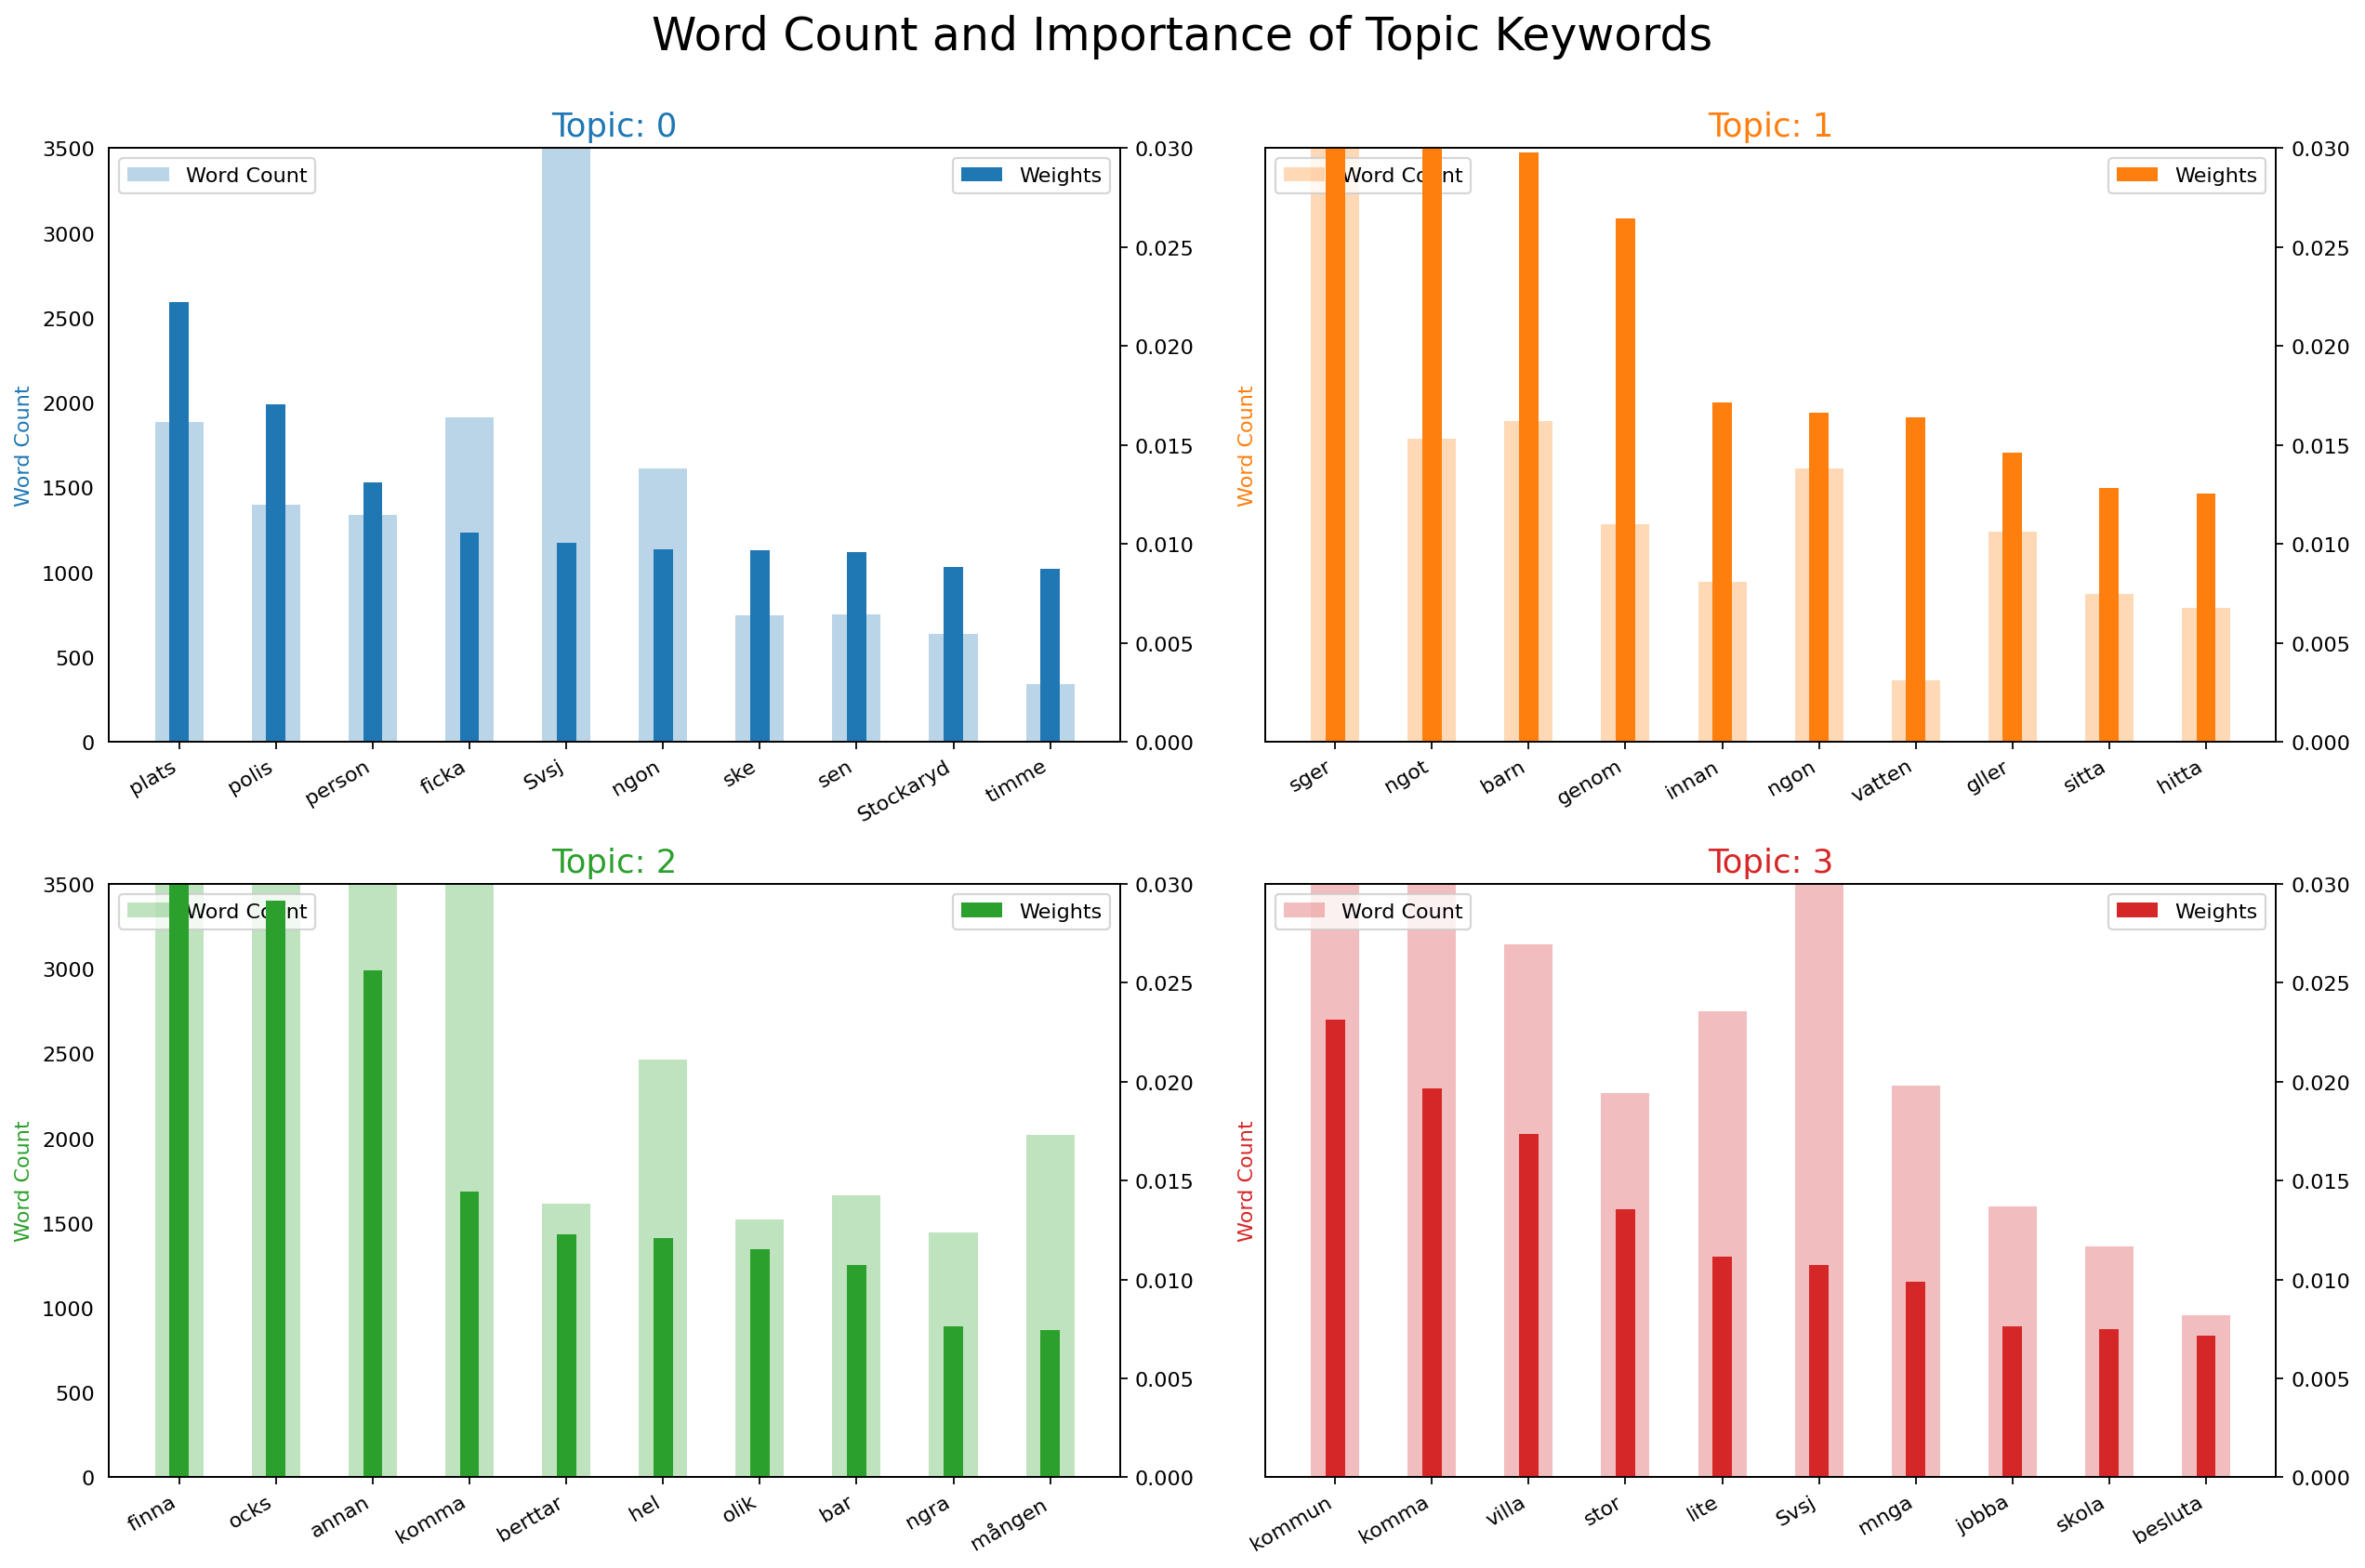

In [488]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in df_articles["LDA"] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [489]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis_data

c:\Users\Arthur\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.263292 -0.224061       1        1  35.886648
2      0.183372  0.264375       2        1  33.031904
0     -0.093263  0.104934       3        1  13.484820
1     -0.223118 -0.014838       4        1   9.467356
4     -0.130283 -0.130411       5        1   8.129272, topic_info=         Term         Freq        Total Category  logprob  loglift
26       sger  8393.000000  8393.000000  Default  30.0000  30.0000
131     finna  5035.000000  5035.000000  Default  29.0000  29.0000
138      ocks  4785.000000  4785.000000  Default  28.0000  28.0000
129     annan  4206.000000  4206.000000  Default  27.0000  27.0000
65     kommun  4129.000000  4129.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
106      mnga   495.342939  2257.700986   Topic5  -4.4012   0.9928
229      kvll   168.263222   275.713276   Topic5  -5.4809   2.0159
246     lrdag   153.178342   250.213681   Topic5  -5.5749   2.0190
3004  avsluta   152.207442   266.158064   Topic5  -5.5812   1.9509
600    blanda   241.084312  1428.224977   Topic5  -5.1213   0.7307

[243 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
997        2  0.999358   Andersson
653        5  0.998433        Anna
2173       2  0.133298       Bengt
2173       5  0.869942       Bengt
11852      5  0.991235  Brygghrnan
...      ...       ...         ...
1357       1  0.730281         vid
1357       3  0.269432         vid
1715       1  0.999761      viktig
483        1  0.999674       villa
4617       5  0.993681      vrlden

[257 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])